In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# essential libraries

# for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

#for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.compose import ColumnTransformer as ct
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# for modeling estimators

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier as gbm
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb

# for measuring performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
import sklearn.metrics as metrics
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#for tuning parameters
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV
from eli5.sklearn import PermutationImportance

# Misc.
import os
import time
import gc
import random
from scipy.stats import uniform
import warnings


Using TensorFlow backend.


In [3]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
train.head()


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
ids=test['Id']
train.shape, test.shape

((9557, 143), (23856, 142))

In [6]:
train.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
test.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.250000,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.250000,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.250000,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.000000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.000000,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.250000,64.00,NaN,324
5,ID_e77d38d45,400000.0,0,3,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,16,NaN,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8ee7365a8,0,2,0,2,no,no,11,13.5,0,0,0,0,0,0,0,1,0,2,1.000000,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,38,256,1444,4,0,0,1.000000,0.00,182.25,1444
6,ID_3c5f4bd51,400000.0,0,3,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,11,NaN,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,8ee7365a8,0,2,0,2,no,no,11,13.5,0,0,0,0,1,0,0,0,0,2,1.000000,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,42,121,1764,4,0,0,1.000000,0.00,182.25,1764
7,ID_a849c29bd,300000.0,0,6,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,14,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0

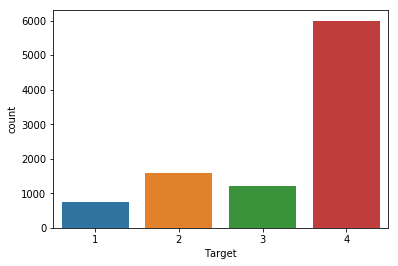

In [8]:
sns.countplot("Target", data=train)

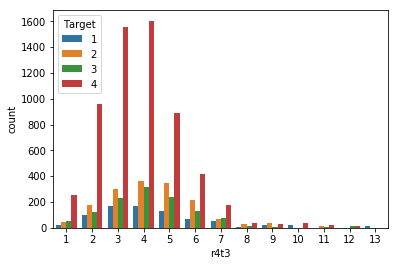

In [9]:
sns.countplot(x="r4t3",hue="Target",data=train)

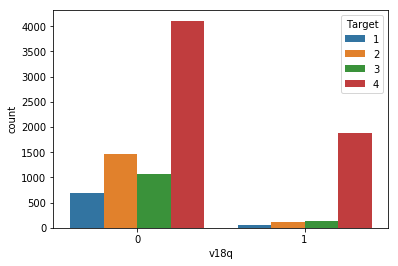

In [10]:
sns.countplot(x="v18q",hue="Target",data=train)

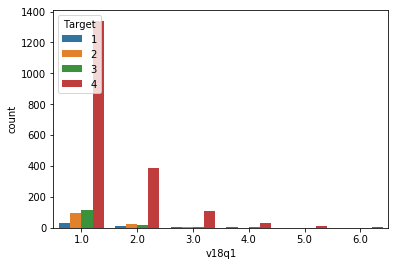

In [11]:
sns.countplot(x="v18q1",hue="Target",data=train)


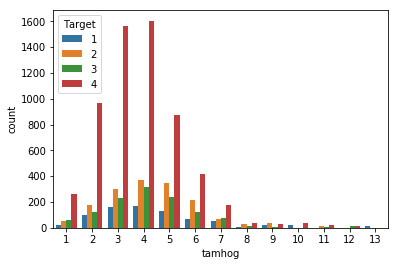

In [12]:
sns.countplot(x="tamhog",hue="Target",data=train)


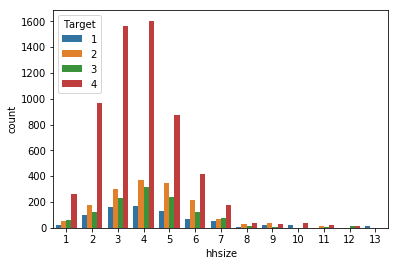

In [13]:
sns.countplot(x="hhsize",hue="Target",data=train)

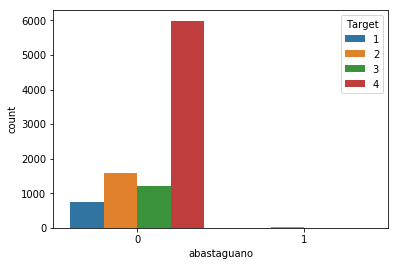

In [14]:
sns.countplot(x="abastaguano",hue="Target",data=train)

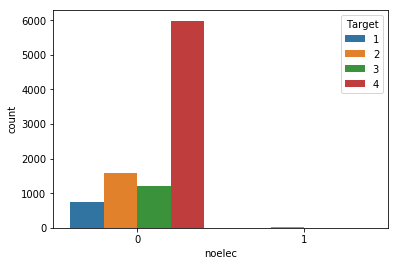

In [15]:
sns.countplot(x="noelec",hue="Target",data=train)

In [16]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [17]:
yes_no_map = {'no':0,'yes':1}
train['dependency'] = train['dependency'].replace(yes_no_map).astype(np.float32)
train['edjefe'] = train['edjefe'].replace(yes_no_map).astype(np.float32)
train['edjefa'] = train['edjefa'].replace(yes_no_map).astype(np.float32)
    

In [18]:
yes_no_map = {'no':0,'yes':1}
test['dependency'] = test['dependency'].replace(yes_no_map).astype(np.float32)
test['edjefe'] = test['edjefe'].replace(yes_no_map).astype(np.float32)
test['edjefa'] = test['edjefa'].replace(yes_no_map).astype(np.float32)

In [19]:
train[["dependency","edjefe","edjefa"]].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.00000
mean,1.149551,5.096788,2.89683
std,1.605967,5.246572,4.61198
min,0.000000,0.000000,0.00000
25%,0.333333,0.000000,0.00000
50%,0.666667,6.000000,0.00000
75%,1.333333,9.000000,6.00000
max,8.000000,21.000000,21.00000


In [20]:
 # Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(10)

,total,percent
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Id,0,0.000000
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [21]:
train['v18q1']     = train['v18q1'].fillna(0)
test['v18q1']      = test['v18q1'].fillna(0)
train['v2a1']      = train['v2a1'].fillna(0)
test['v2a1']       = test['v2a1'].fillna(0)

train['rez_esc']   = train['rez_esc'].fillna(0)
test['rez_esc']    = test['rez_esc'].fillna(0)
train['SQBmeaned'] = train['SQBmeaned'].fillna(0)
test['SQBmeaned']  = test['SQBmeaned'].fillna(0)
train['meaneduc']  = train['meaneduc'].fillna(0)
test['meaneduc']   = test['meaneduc'].fillna(0)

In [22]:
#Checking for missing values again to confirm that no missing values present
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(10)

,total,percent
Id,0,0.0
hogar_mayor,0,0.0
parentesco10,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_total,0,0.0
parentesco8,0,0.0


In [23]:
#Checking for missing values again to confirm that no missing values present
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(10)

,total,percent
Id,0,0.0
hogar_adul,0,0.0
parentesco9,0,0.0
parentesco10,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_mayor,0,0.0
parentesco7,0,0.0


In [24]:
train.drop(['Id','idhogar'], inplace = True, axis =1)

test.drop(['Id','idhogar'], inplace = True, axis =1)

In [25]:
train.shape

(9557, 141)

In [26]:
test.shape

(23856, 140)

### Dividing the data into predictors and target

In [27]:
y = train.iloc[:,140]
X = train.iloc[:,1:141]
X.shape, y.shape

((9557, 140), (9557,))

### Scaling numeric features & applying PCA to reduce features

In [28]:
my_imputer = SimpleImputer()
X = my_imputer.fit_transform(X)
scale = ss()
X = scale.fit_transform(X)


In [29]:
#subjecting the same to test data
my_imputer = SimpleImputer()
test = my_imputer.fit_transform(test)
scale = ss()
test = scale.fit_transform(test)


### final selected features fr modelling

In [30]:
X.shape, y.shape,test.shape

((9557, 140), (9557,), (23856, 140))

### splitting the data into train and test 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size = 0.2)

## Modlelling with Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier as rf
modelrf = rf()

start = time.time()
modelrf = modelrf.fit(X_train, y_train)
end = time.time()
(end-start)/60

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0024696946144104003

In [34]:
out_class = modelrf.predict(X_test)
out_class

array([4, 2, 2, ..., 4, 4, 4])

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, out_class)
cm



array([[ 124,   17,    7,    3],
       [   8,  318,    6,    2],
       [   0,   15,  224,    9],
       [   0,    1,    0, 1178]])

In [40]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, out_class)
accuracy

0.9644351464435147

### Performing tuning using Bayesian Optimization.


In [41]:
bayes_cv_tuner = BayesSearchCV(
    rf(
       n_jobs = 2         
      ),
    
    {
        'n_estimators': (100, 500),         
        'criterion': ['gini', 'entropy'],     
        'max_depth': (4, 100),                
        'max_features' : (10,64),            
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   
    },

    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)

In [42]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [43]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 64,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 173}

In [45]:
#using the best params 
modelrfTuned=rf(criterion="entropy",
               max_depth=100,
               max_features=64,
               min_weight_fraction_leaf=0.0,
               n_estimators=173)

In [56]:
#fit the data in the model
modelrfTuned = modelrfTuned.fit(X_train, y_train)

#Predict
y_rf=modelrfTuned.predict(X_test)
y_rf

array([4, 2, 2, ..., 4, 4, 4])

In [57]:
#predict for the test data
y_rf_test=modelrfTuned.predict(test)
y_rf_test

(1912, 140)

In [62]:
#  Get what average accuracy was acheived during cross-validation
accuracy = bayes_cv_tuner.best_score_
accuracy

1.0

In [63]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)


1.0

In [ ]:
#  what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

#### Accuracy improved from ____96.44%____ to __100%____


### Modelling with KNeighborsClassifier


In [64]:
modelknn = KNeighborsClassifier(n_neighbors=4)

In [69]:
start = time.time()
modelknn = modelknn.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.001942439874013265

In [70]:
out_class = modelrf.predict(X_test)
out_class

array([4, 2, 2, ..., 4, 4, 4])

In [71]:
(out_class == y_test).sum()/y_test.size 

0.9644351464435147

In [72]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, out_class)
cm

array([[ 124,   17,    7,    3],
       [   8,  318,    6,    2],
       [   0,   15,  224,    9],
       [   0,    1,    0, 1178]])

In [73]:
#from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, out_class)
accuracy

0.9644351464435147

### Performing tuning using Bayesian Optimization.


In [74]:
bayes_cv_tuner = BayesSearchCV(
    
    KNeighborsClassifier(
       n_neighbors=4        
      ),
    {"metric": ["euclidean", "cityblock"]},
    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
   )

In [75]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimize

/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimize

/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/skopt/optimizer/optimize

BayesSearchCV(cv=2, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'metric': ['euclidean', 'cityblock']}, verbose=0)

In [76]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'metric': 'cityblock'}

In [77]:
modelneighTuned = KNeighborsClassifier(n_neighbors=4,metric="cityblock")

In [78]:
#Fit to the model
modelneighTuned = modelneighTuned.fit(X_train, y_train)

# Predict 
y_neigh=modelneighTuned.predict(X_test)


In [81]:
# predict for the test data

y_neigh_test=modelneighTuned.predict(test)

In [83]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

0.8943514644351465

#### Accuray reduced from 96.44% to 89.43%

### Modelling with GradientBoostingClassifier


In [85]:
modelgbm=gbm()
start = time.time()
modelgbm = modelgbm.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.07464439868927002

In [86]:
out_class = modelgbm.predict(X_test)

out_class

array([4, 2, 2, ..., 4, 4, 4])

In [87]:
(out_class == y_test).sum()/y_test.size 

1.0

In [89]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, out_class)
cm

array([[ 151,    0,    0,    0],
       [   0,  334,    0,    0],
       [   0,    0,  248,    0],
       [   0,    0,    0, 1179]])

In [90]:
#from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, out_class)
accuracy

1.0

### Performing tuning using Bayesian Optimization.


In [91]:
bayes_cv_tuner = BayesSearchCV(

    gbm(
      ),
    {
        'n_estimators': (100, 500),           
        
        'max_depth': (4, 100),               
        'max_features' : (10,64),            
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   
    },
    n_iter=32,            # How many points to sample
    cv = 2                # Number of cross-validation folds
)

In [92]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=2, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [93]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'max_depth': 100,
 'max_features': 64,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500}

In [94]:
modelgbmTuned=gbm(
               max_depth=100,
               max_features=64,
               min_weight_fraction_leaf=0.0,
               n_estimators=500)

In [95]:
#Re fitting the model with optimized parameters
modelgbmTuned = modelgbmTuned.fit(X_train, y_train)

# Predict
y_gbm=modelgbmTuned.predict(X_test)


In [96]:
# Predicting for the test data
y_gbm_test=modelgbmTuned.predict(test)

In [99]:
#  Get what average accuracy was acheived during cross-validation
accuracy = bayes_cv_tuner.best_score_
accuracy

1.0

In [100]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

1.0

In [101]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'max_depth': 65,
  'max_features': 52,
  'min_weight_fraction_leaf': 0.2314469814993872,
  'n_estimators': 491},
 {'max_depth': 85,
  'max_features': 36,
  'min_weight_fraction_leaf': 0.16655873504916782,
  'n_estimators': 136},
 {'max_depth': 67,
  'max_features': 37,
  'min_weight_fraction_leaf': 0.09667627268219695,
  'n_estimators': 434},
 {'max_depth': 18,
  'max_features': 16,
  'min_weight_fraction_leaf': 0.15584468044146313,
  'n_estimators': 211},
 {'max_depth': 72,
  'max_features': 44,
  'min_weight_fraction_leaf': 0.12476362948005973,
  'n_estimators': 322},
 {'max_depth': 8,
  'max_features': 32,
  'min_weight_fraction_leaf': 0.1180344684517621,
  'n_estimators': 104},
 {'max_depth': 49,
  'max_features': 62,
  'min_weight_fraction_leaf': 0.24353203342120328,
  'n_estimators': 250},
 {'max_depth': 59,
  'max_features': 25,
  'min_weight_fraction_leaf': 0.43234116769855097,
  'n_estimators': 189},
 {'max_depth': 78,
  'max_features': 54,
  'min_weight_fraction_leaf': 0.19

In [ ]:
#### accracy is high 100% before and after optimization

   ## Modelling with ExtraTreeClassifier

In [102]:
model_etf = ExtraTreesClassifier()

In [103]:
start = time.time()
model_etf = model_etf.fit(X_train, y_train)
end = time.time()
(end-start)/60

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0028137564659118652

In [104]:
out_class = model_etf.predict(X_test)

out_class

array([4, 2, 2, ..., 4, 4, 4])

In [105]:
(out_class == y_test).sum()/y_test.size

0.9827405857740585

In [107]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, out_class)
cm

array([[ 145,    6,    0,    0],
       [   6,  320,    6,    2],
       [   0,    4,  237,    7],
       [   0,    1,    1, 1177]])

In [108]:
#from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, out_class)
accuracy


0.9827405857740585

### Performing tuning using Bayesian Optimization.¶


In [109]:
bayes_cv_tuner = BayesSearchCV(

    ExtraTreesClassifier( ),   
    {   'n_estimators': (100, 500),           
        'criterion': ['gini', 'entropy'],     
        'max_depth': (4, 100),                
        'max_features' : (10,64),             
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   
    },

    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
)


In [111]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=2, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=False, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [112]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 64,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [114]:
#using the best parameters
modeletfTuned=ExtraTreesClassifier(criterion="entropy",
               max_depth=4,
               max_features=64,
               min_weight_fraction_leaf=0.0,
               n_estimators=100)

In [115]:
#Fit the model
modeletfTuned = modeletfTuned.fit(X_train, y_train)

# predict
y_etf=modeletfTuned.predict(X_test)

In [116]:
#predict with the test data
y_etftest=modeletfTuned.predict(test)

In [118]:
#  Get what average accuracy was acheived during cross-validation
accuracy = bayes_cv_tuner.best_score_
accuracy

1.0

In [120]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'criterion': 'gini',
  'max_depth': 83,
  'max_features': 24,
  'min_weight_fraction_leaf': 0.2817461901727837,
  'n_estimators': 372},
 {'criterion': 'gini',
  'max_depth': 67,
  'max_features': 42,
  'min_weight_fraction_leaf': 0.3011506446989703,
  'n_estimators': 475},
 {'criterion': 'gini',
  'max_depth': 5,
  'max_features': 33,
  'min_weight_fraction_leaf': 0.3068540932704002,
  'n_estimators': 125},
 {'criterion': 'entropy',
  'max_depth': 77,
  'max_features': 48,
  'min_weight_fraction_leaf': 0.3311422877677018,
  'n_estimators': 161},
 {'criterion': 'gini',
  'max_depth': 54,
  'max_features': 31,
  'min_weight_fraction_leaf': 0.0371719881396766,
  'n_estimators': 317},
 {'criterion': 'entropy',
  'max_depth': 45,
  'max_features': 27,
  'min_weight_fraction_leaf': 0.34347356817939095,
  'n_estimators': 452},
 {'criterion': 'entropy',
  'max_depth': 7,
  'max_features': 58,
  'min_weight_fraction_leaf': 0.3508626250981808,
  'n_estimators': 128},
 {'criterion': 'entropy',


In [ ]:
#### accracy increased from 98.27% to 100%

### Modelling with XGBClassifier

In [124]:
model_xgb=XGBClassifier()

In [125]:
start = time.time()
model_xgb = model_xgb.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.18437055746714273

In [ ]:
out_class = model_xgb.predict(X_test)

out_class

In [127]:
(out_class == y_test).sum()/y_test.size 

1.0

In [131]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, out_class)
cm

array([[ 151,    0,    0,    0],
       [   0,  334,    0,    0],
       [   0,    0,  248,    0],
       [   0,    0,    0, 1179]])

In [132]:

#from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, out_class)
accuracy

1.0

### Performing tuning using Bayesian Optimization.

In [133]:
bayes_cv_tuner = BayesSearchCV(

    XGBClassifier(
       n_jobs = 2         
      ),
    {
        'n_estimators': (100, 500),           
        'criterion': ['gini', 'entropy'],     
        'max_depth': (4, 100),                
        'max_features' : (10,64),             
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   
    },

    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)

In [134]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [135]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'entropy',
 'max_depth': 51,
 'max_features': 16,
 'min_weight_fraction_leaf': 0.28801095368966545,
 'n_estimators': 355}

In [136]:
modelxgbTuned=XGBClassifier(criterion="entropy",
               max_depth=51,
               max_features=16,
               min_weight_fraction_leaf=0.2150244429465713,
               n_estimators=355)

In [137]:
# refit the model with optimized data
modelxgbTuned = modelxgbTuned.fit(X_train, y_train)

#predict
y_xgb=modelxgbTuned.predict(X_test)

In [138]:
y_xgbtest=modelxgbTuned.predict(test)

In [140]:
#  Get what average accuracy was acheived during cross-validation
accuracy = bayes_cv_tuner.best_score_
accuracy

1.0

In [141]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

1.0

In [142]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'criterion': 'entropy',
  'max_depth': 51,
  'max_features': 16,
  'min_weight_fraction_leaf': 0.28801095368966545,
  'n_estimators': 355},
 {'criterion': 'entropy',
  'max_depth': 95,
  'max_features': 11,
  'min_weight_fraction_leaf': 0.48225348271835705,
  'n_estimators': 160},
 {'criterion': 'entropy',
  'max_depth': 75,
  'max_features': 64,
  'min_weight_fraction_leaf': 0.14457039026629057,
  'n_estimators': 295},
 {'criterion': 'gini',
  'max_depth': 54,
  'max_features': 30,
  'min_weight_fraction_leaf': 0.2564381555112412,
  'n_estimators': 350},
 {'criterion': 'gini',
  'max_depth': 62,
  'max_features': 50,
  'min_weight_fraction_leaf': 0.05587902460283846,
  'n_estimators': 459},
 {'criterion': 'gini',
  'max_depth': 95,
  'max_features': 24,
  'min_weight_fraction_leaf': 0.24897045645213267,
  'n_estimators': 245},
 {'criterion': 'entropy',
  'max_depth': 6,
  'max_features': 45,
  'min_weight_fraction_leaf': 0.04696335186853702,
  'n_estimators': 436},
 {'criterion': 'g

#### Accuracy is same 100%

### Modelling with Light Gradient Booster

In [145]:
model_lgb = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.1, objective='multiclass',
                             random_state=None, silent=True, metric='None', 
                             n_jobs=4, n_estimators=5000, class_weight='balanced',
                             colsample_bytree =  0.93, min_child_samples = 95, num_leaves = 14, subsample = 0.96)


In [146]:
start = time.time()
model_lgb = model_lgb.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.4302504301071167

In [147]:
out_class = model_lgb.predict(X_test)

out_class

array([4, 2, 2, ..., 4, 4, 4])

In [148]:
(out_class == y_test).sum()/y_test.size 

1.0

In [149]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, out_class)
cm


array([[ 151,    0,    0,    0],
       [   0,  334,    0,    0],
       [   0,    0,  248,    0],
       [   0,    0,    0, 1179]])

In [150]:
#from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, out_class)
accuracy

1.0

### Performing tuning using Bayesian Optimization.

In [151]:
bayes_cv_tuner = BayesSearchCV(

    lgb.LGBMClassifier(
       n_jobs = 2         
      ),

    {
        'n_estimators': (100, 500),           
        'criterion': ['gini', 'entropy'],     
        'max_depth': (4, 100),                
        'max_features' : (10,64),             
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   
    },
    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)

In [152]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=3, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=2, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [153]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'max_features': 48,
 'min_weight_fraction_leaf': 0.4939249242565817,
 'n_estimators': 437}

In [154]:
modellgbTuned = lgb.LGBMClassifier(criterion="gini",
               max_depth=23,
               max_features=48,
               min_weight_fraction_leaf=0.4939249242565817,
               n_estimators=437)

In [156]:
# Re fit the model
modellgbTuned = modellgbTuned.fit(X_train, y_train)

# Predict
y_lgb=modellgbTuned.predict(X_test)

In [157]:
# predict for the test data
y_lgb_test=modellgbTuned.predict(test)


In [158]:
#  Get what average accuracy was acheived during cross-validation
accuracy = bayes_cv_tuner.best_score_
accuracy

1.0

In [159]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

1.0

In [160]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'criterion': 'gini',
  'max_depth': 23,
  'max_features': 48,
  'min_weight_fraction_leaf': 0.4939249242565817,
  'n_estimators': 437},
 {'criterion': 'entropy',
  'max_depth': 56,
  'max_features': 27,
  'min_weight_fraction_leaf': 0.03880700679724864,
  'n_estimators': 149},
 {'criterion': 'gini',
  'max_depth': 69,
  'max_features': 19,
  'min_weight_fraction_leaf': 0.007749962493927289,
  'n_estimators': 394},
 {'criterion': 'gini',
  'max_depth': 40,
  'max_features': 58,
  'min_weight_fraction_leaf': 0.43191601815324476,
  'n_estimators': 484},
 {'criterion': 'entropy',
  'max_depth': 44,
  'max_features': 11,
  'min_weight_fraction_leaf': 0.49661656322965075,
  'n_estimators': 163},
 {'criterion': 'entropy',
  'max_depth': 65,
  'max_features': 23,
  'min_weight_fraction_leaf': 0.3691289343405397,
  'n_estimators': 360},
 {'criterion': 'gini',
  'max_depth': 98,
  'max_features': 54,
  'min_weight_fraction_leaf': 0.17146157659775826,
  'n_estimators': 410},
 {'criterion': 'ent

#### accracy is the same 100%

In [165]:
## looking at the accuracy before and after tuning all the models I am choosing Random Forest with following params
## as it was giving the optimum accuracy
modelrfTuned=rf(criterion="entropy",
               max_depth=100,
               max_features=64,
               min_weight_fraction_leaf=0.0,
               n_estimators=173)

#fit the data in the model
modelrfTuned = modelrfTuned.fit(X_train, y_train)

#predict for the test data
y_rf_test=modelrfTuned.predict(test)
y_rf_test

array([2, 3, 3, ..., 2, 2, 4])

### Reading the Test file again and apending the predicted out .put column 
#### Mahine learning algorithm used Random Forest 
#### Tuning done using Bayesian Optimization technique

In [175]:
test_final = pd.read_csv('../input/test.csv')

test_final['Pred_Out'] = y_rf_test.tolist()

test_final.head(10)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Pred_Out
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.250000,0.25,272.25,16,2
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.250000,0.25,272.25,1681,3
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.250000,0.25,272.25,1681,3
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.000000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.000000,0.00,256.00,3481,4
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.250000,64.00,NaN,324,3
5,ID_e77d38d45,400000.0,0,3,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,16,NaN,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8ee7365a8,0,2,0,2,no,no,11,13.5,0,0,0,0,0,0,0,1,0,2,1.000000,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,38,256,1444,4,0,0,1.000000,0.00,182.25,1444,3
6,ID_3c5f4bd51,400000.0,0,3,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,11,NaN,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,8ee7365a8,0,2,0,2,no,no,11,13.5,0,0,0,0,1,0,0,0,0,2,1.000000,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,42,121,1764,4,0,0,1.000000,0.00,182.25,1764,3
7,ID_a849c29bd,300000.0,0,6,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,14,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,